### Complete Practical Time Series Analysis
- Module: Time Series Data Visualization
- [Udemy](www.datascienceanywhere.com/udemy/timeseriesforecast)


In [ ]:
import os
from google.colab import drive
drive.mount('drive/')

In [ ]:
# set the current path
os.chdir('drive/My Drive/Complete_time_series/')

In [ ]:
ls data

Debourgh-Sales.xlsx  nybirth.csv


### Loading data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load the data using pandas
df = pd.read_excel('./data/Debourgh-Sales.xlsx',sheet_name='Sheet2')
df.head()

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Years   108 non-null    datetime64[ns]
 1   Sales   108 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


#### Line Plot

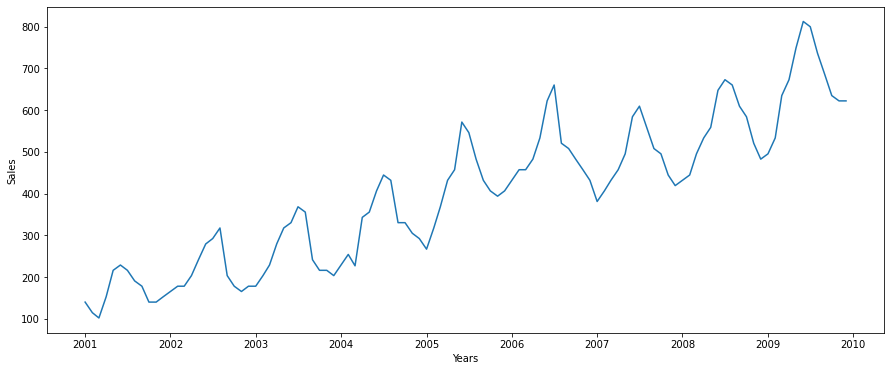

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Years',y='Sales',data=df)
plt.show()

In [ ]:
df1 = df.set_index('Years')
df1

,Sales
Years,
2001-01-01,139.7
2001-02-01,114.3
2001-03-01,101.6
2001-04-01,152.4
2001-05-01,215.9
...,...
2009-08-01,736.6
2009-09-01,685.5
2009-10-01,635.0


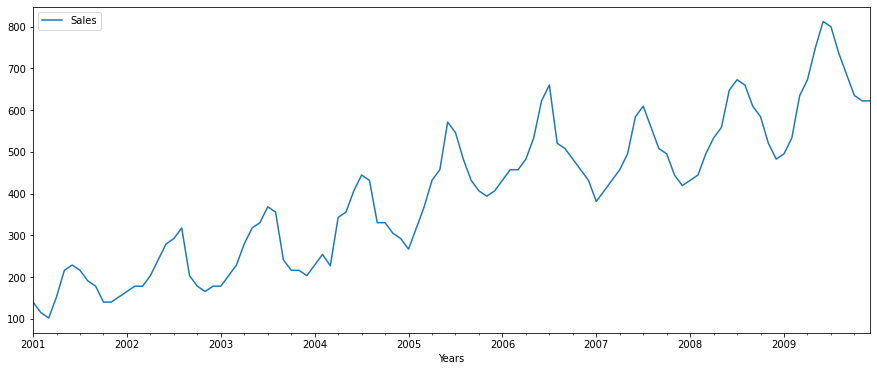

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
df1.plot(kind='line',ax=ax)
plt.show()

In [ ]:
df['year'] = df['Years'].dt.year
df['quarter'] = df['Years'].dt.quarter

In [ ]:
df.head()

,Years,Sales,year,quarter
0,2001-01-01,139.7,2001,1
1,2001-02-01,114.3,2001,1
2,2001-03-01,101.6,2001,1
3,2001-04-01,152.4,2001,2
4,2001-05-01,215.9,2001,2


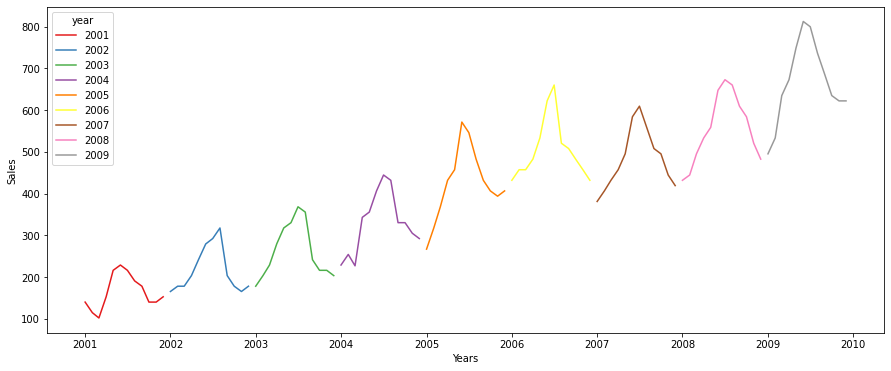

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Years',y='Sales',data=df,hue='year',palette='Set1')
plt.show()

#### Area plot

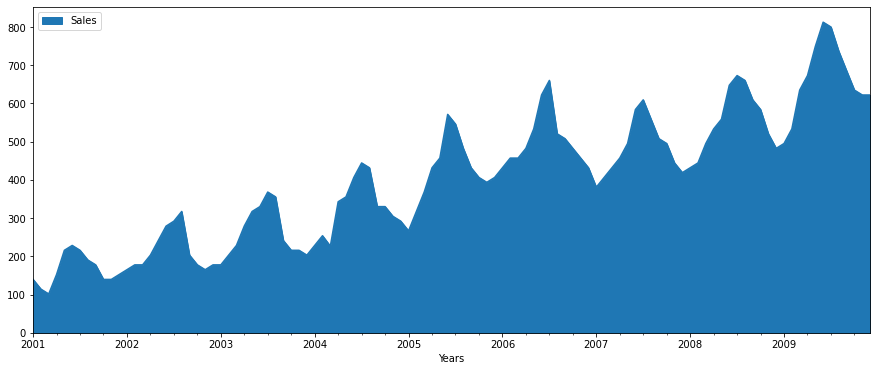

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
df1.plot(kind='area',ax=ax)
plt.show()

#### Bar plot

In [ ]:
df_year = df[['Sales','year']].groupby(by='year').sum().reset_index()

In [ ]:
df_year

,year,Sales
0,2001,1968.5
1,2002,2577.8
2,2003,3136.9
3,2004,3947.8
4,2005,5080.0
5,2006,6045.2
6,2007,5791.2
7,2008,6642.1
8,2009,8000.7


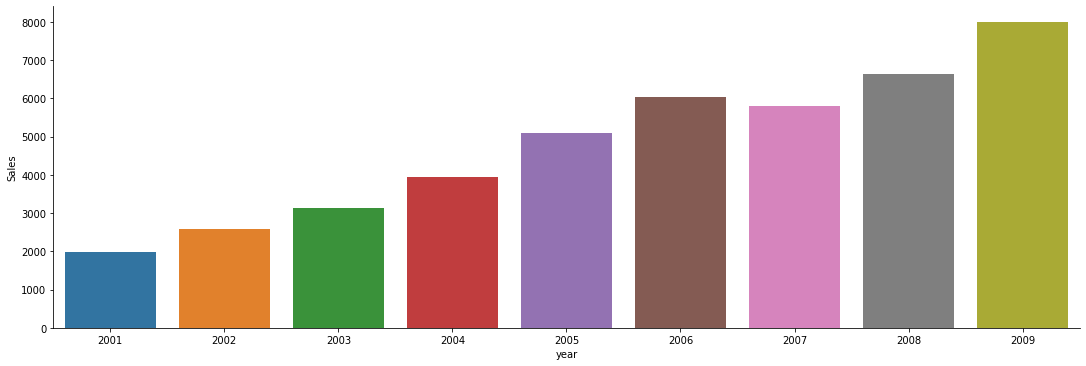

In [ ]:
sns.catplot(x='year',y='Sales',data=df_year,kind='bar',aspect=3)

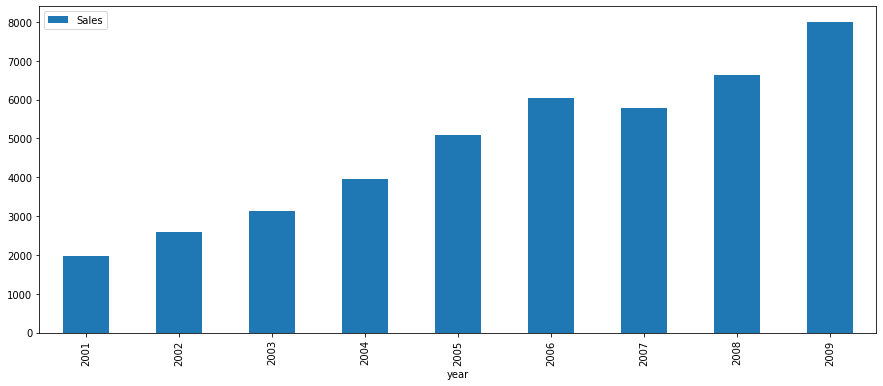

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
df_year.set_index('year').plot(kind='bar',ax=ax)
plt.show()

#### stacked bar plot

In [ ]:
sales = df[['Sales','year','quarter']].groupby(by=['year','quarter']).sum().values
sales

array([[ 355.6],
       [ 596.9],
       [ 584.2],
       [ 431.8],
       [ 520.7],
       [ 723.6],
       [ 812.8],
       [ 520.7],
       [ 609.6],
       [ 927.1],
       [ 965.2],
       [ 635. ],
       [ 709.3],
       [1104.9],
       [1206.5],
       [ 927.1],
       [ 952.5],
       [1460.5],
       [1460.5],
       [1206.5],
       [1346.2],
       [1638.3],
       [1689.1],
       [1371.6],
       [1219.2],
       [1536.7],
       [1676.4],
       [1358.9],
       [1371.6],
       [1739.9],
       [1943.1],
       [1587.5],
       [1663.7],
       [2235.2],
       [2222.2],
       [1879.6]])

In [ ]:
sales.shape

(36, 1)

9 years and each year has 4 quarter

In [ ]:
df_sales = pd.DataFrame(sales.reshape(9,4),index=list(range(2001,2010)),columns=['Q1','Q2','Q3','Q4'])

In [ ]:
df_sales

,Q1,Q2,Q3,Q4
2001,355.6,596.9,584.2,431.8
2002,520.7,723.6,812.8,520.7
2003,609.6,927.1,965.2,635.0
2004,709.3,1104.9,1206.5,927.1
2005,952.5,1460.5,1460.5,1206.5
2006,1346.2,1638.3,1689.1,1371.6
2007,1219.2,1536.7,1676.4,1358.9
2008,1371.6,1739.9,1943.1,1587.5
2009,1663.7,2235.2,2222.2,1879.6


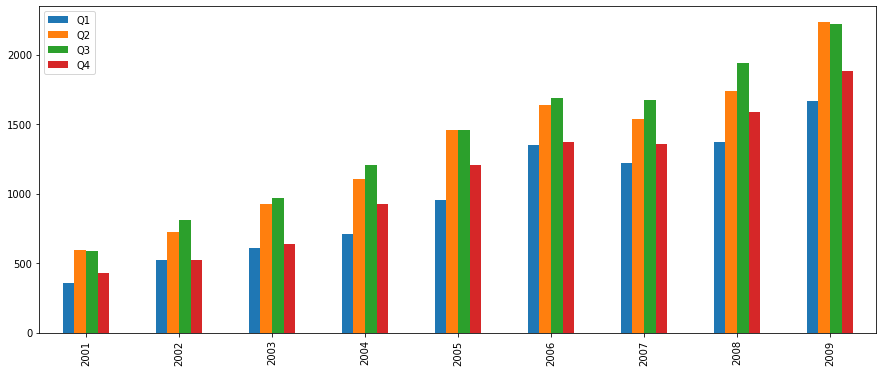

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
df_sales.plot(kind='bar',ax=ax)
plt.show()

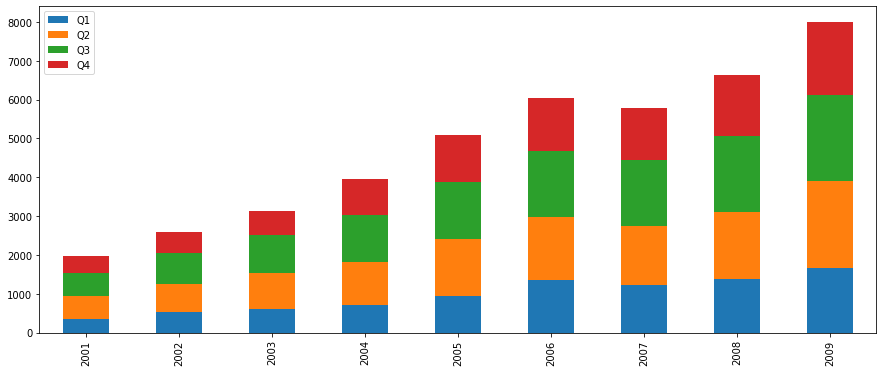

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
df_sales.plot(kind='bar',ax=ax,stacked=True)
plt.show()

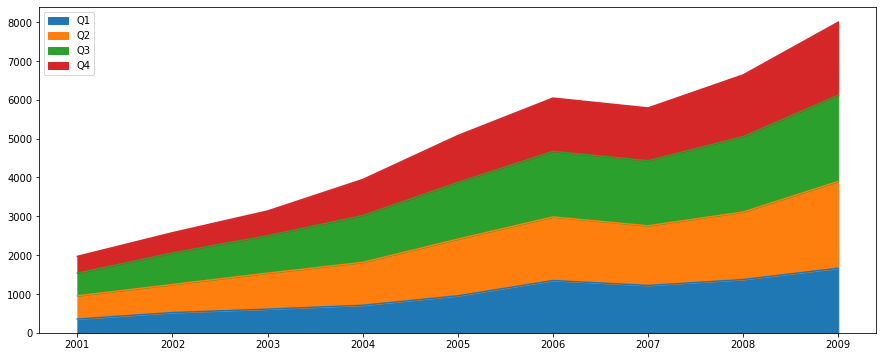

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
df_sales.plot(kind='area',ax=ax,stacked=True)
plt.show()

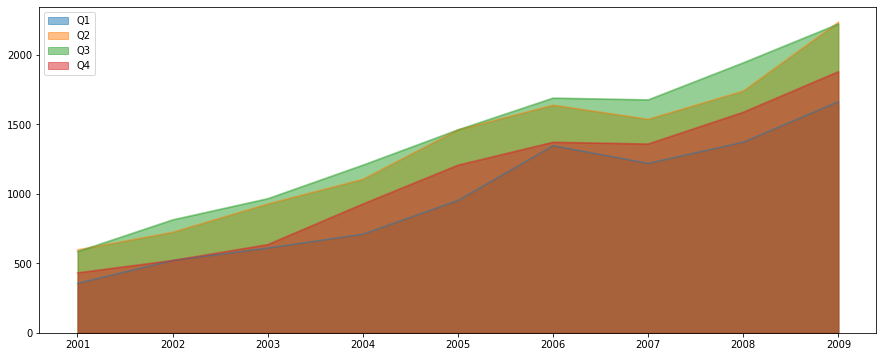

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
df_sales.plot(kind='area',ax=ax,stacked=False)
plt.show()

#### Heatmap

In [ ]:
df_sales

,Q1,Q2,Q3,Q4
2001,355.6,596.9,584.2,431.8
2002,520.7,723.6,812.8,520.7
2003,609.6,927.1,965.2,635.0
2004,709.3,1104.9,1206.5,927.1
2005,952.5,1460.5,1460.5,1206.5
2006,1346.2,1638.3,1689.1,1371.6
2007,1219.2,1536.7,1676.4,1358.9
2008,1371.6,1739.9,1943.1,1587.5
2009,1663.7,2235.2,2222.2,1879.6


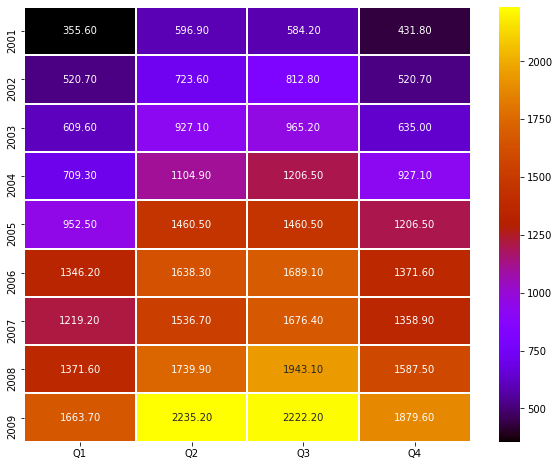

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_sales,annot=True,fmt='.2f',cmap='gnuplot',linewidths=1)
plt.show()

---
www.datascienceanywhere.com/
